In [2]:
using PyPlot, LsqFit

INFO: Precompiling module Optim...
INFO: Precompiling module Distributions...


In [59]:
archivosTodos=readdir("./");
archivosTek=filter(x->contains(x,"tek"), archivosTodos) #solo tomo archivos que incluyan la palabra "tek" en su nombre;
archivos=archivosTek[9:end] #me interesan los archivos 0008-0033
potencias=[(8.3:-0.5:2.3),(1.8:-0.3:0.3),(0.25:-0.05:0.05),0.0333,0.0333];

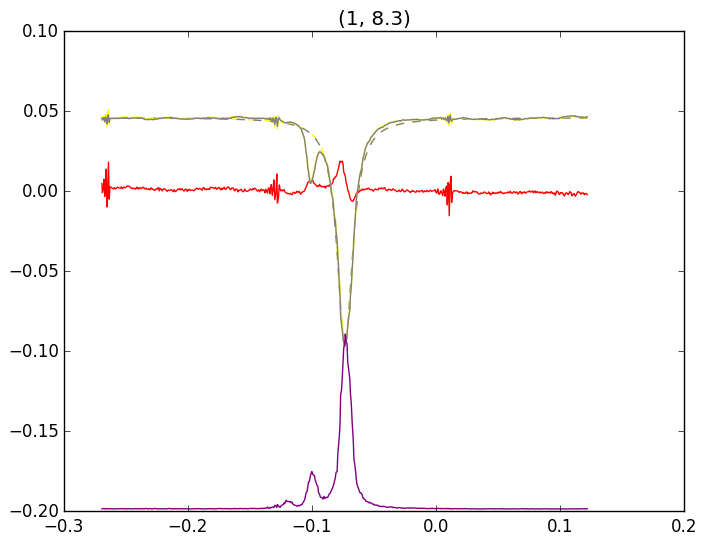

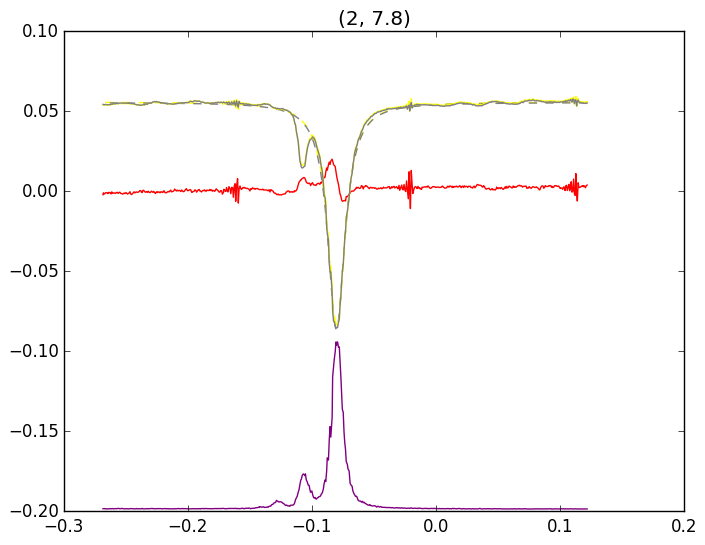

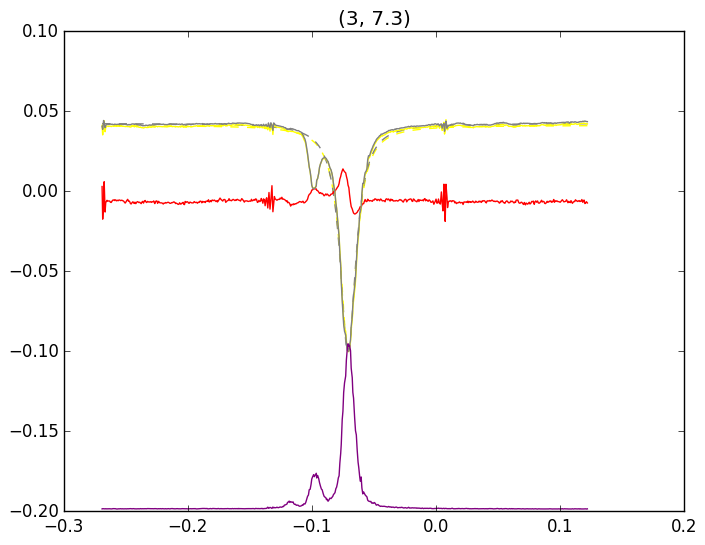

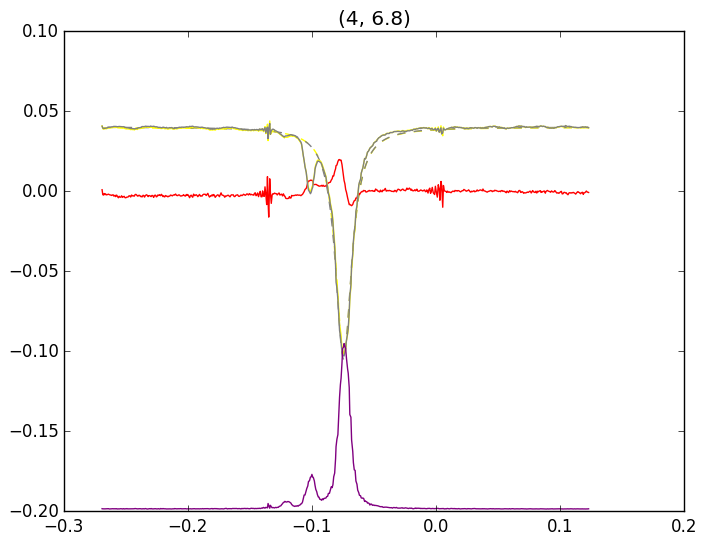

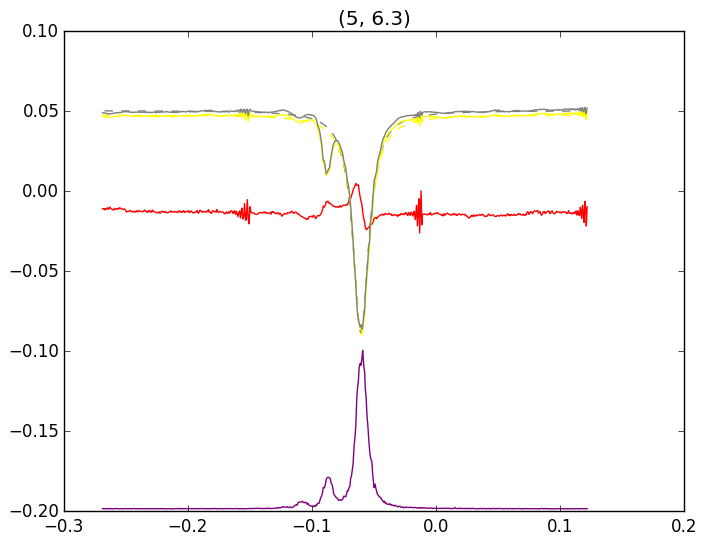

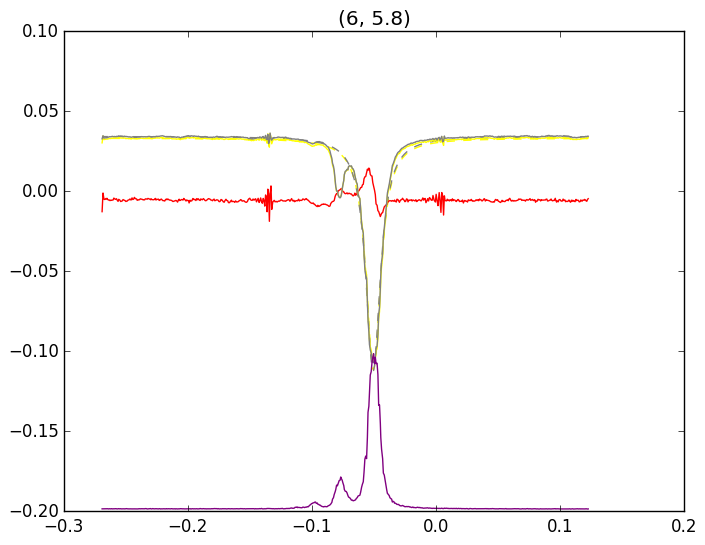

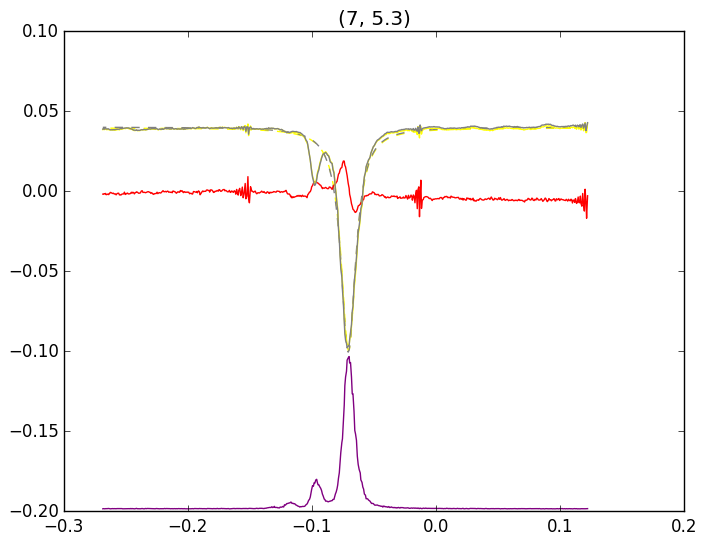

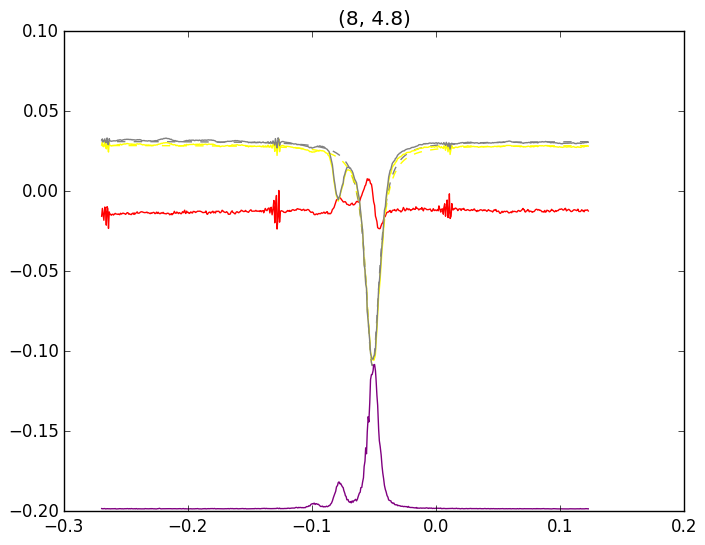

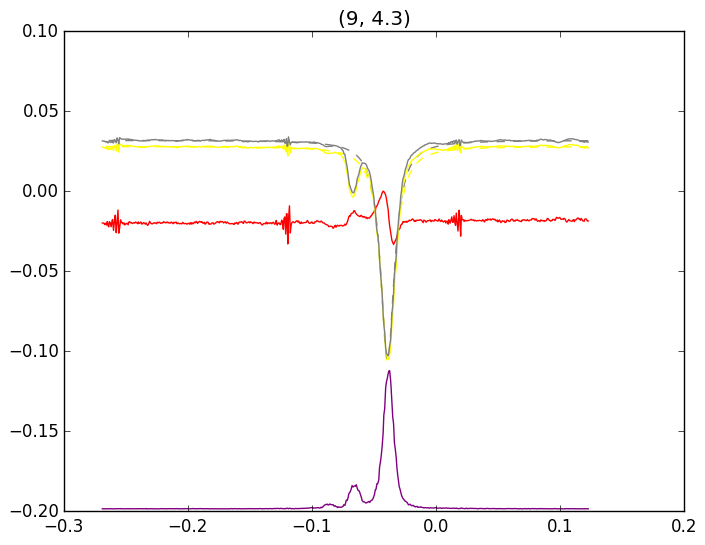

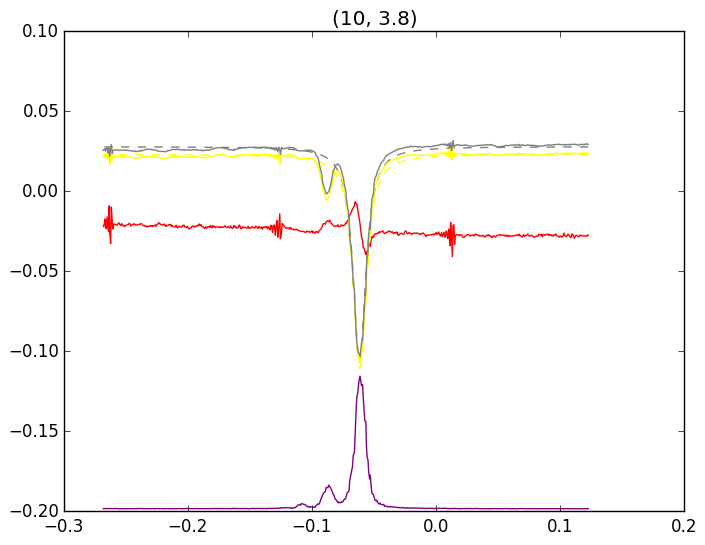

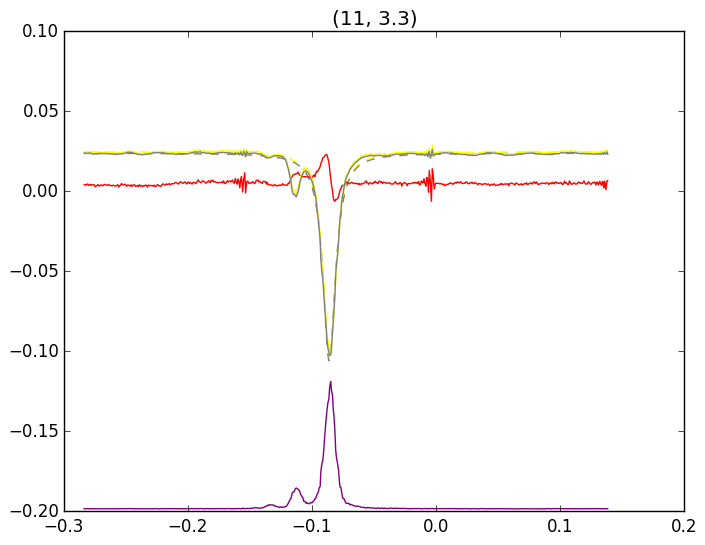

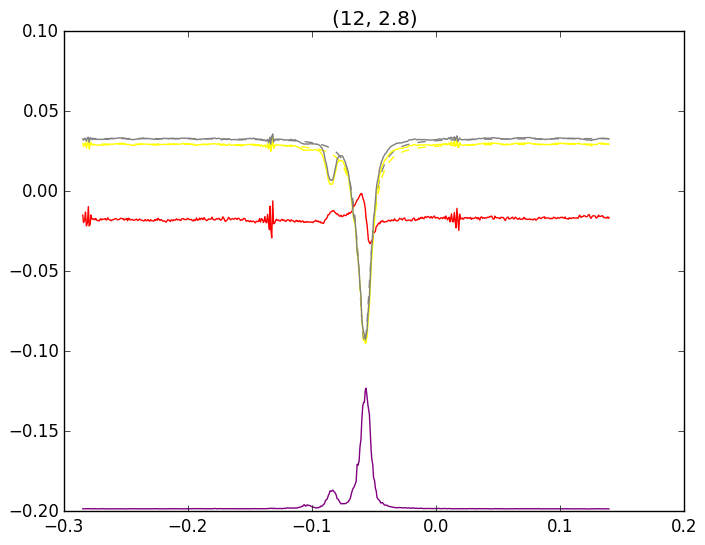

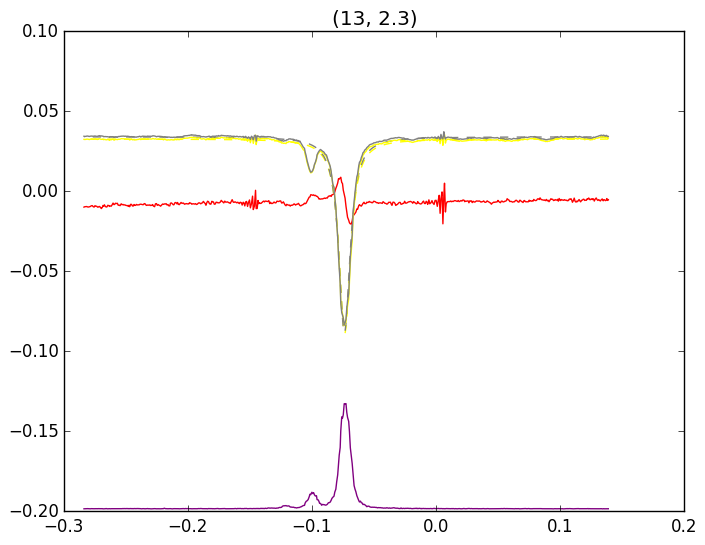

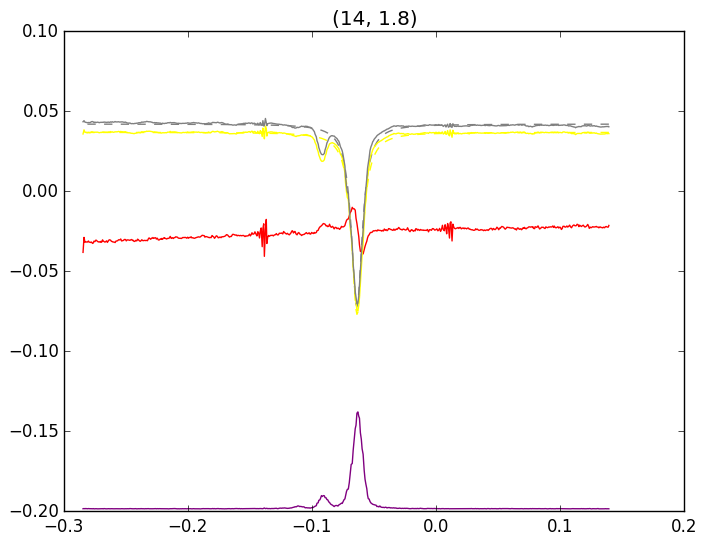

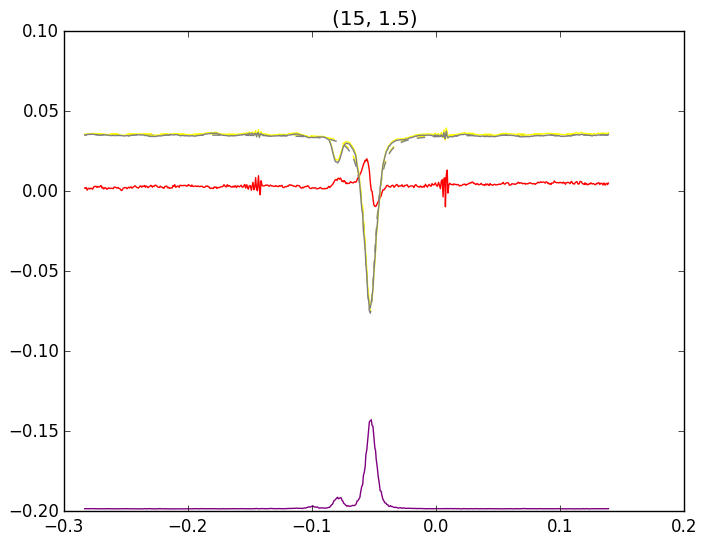

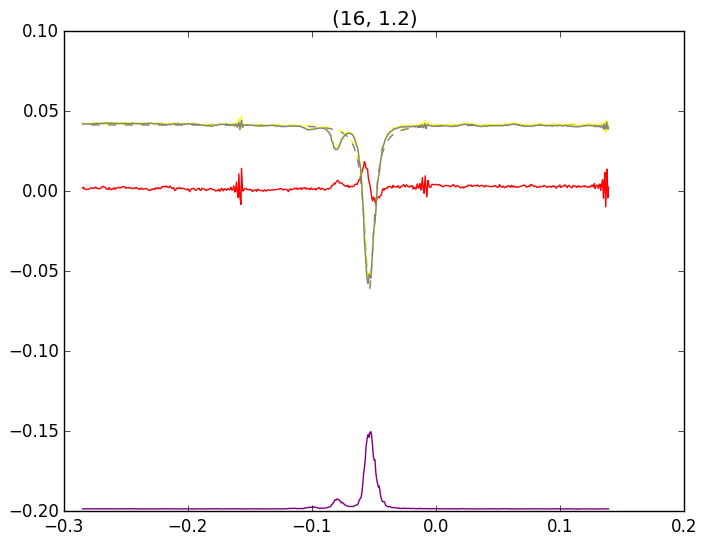

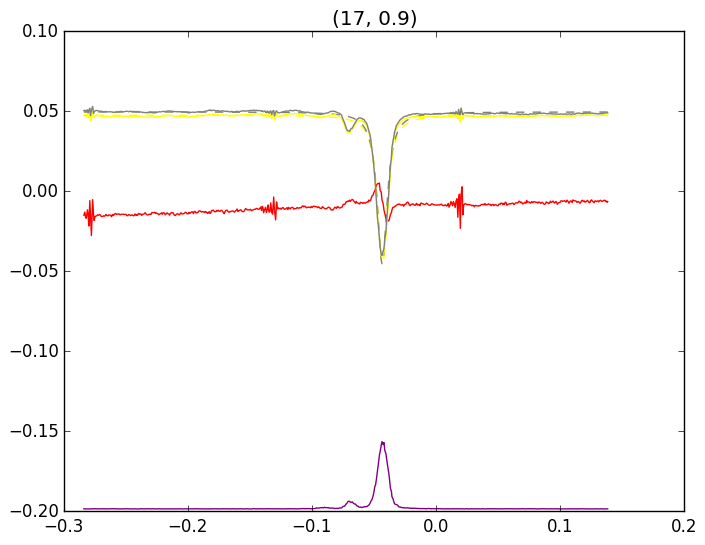

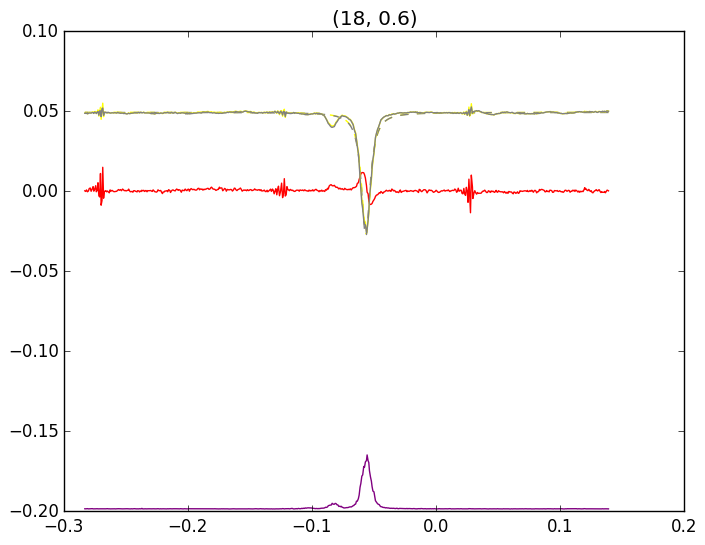

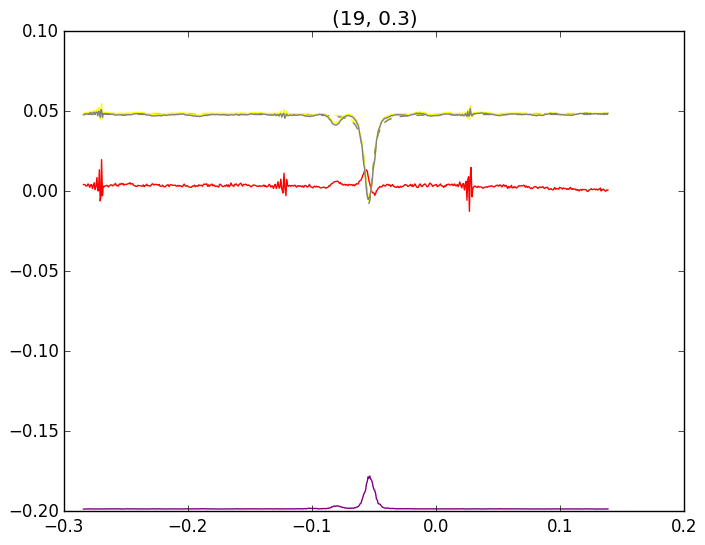

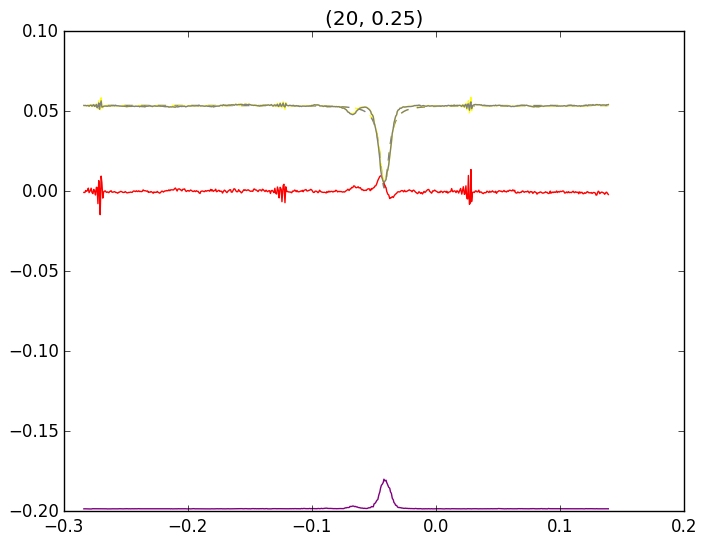

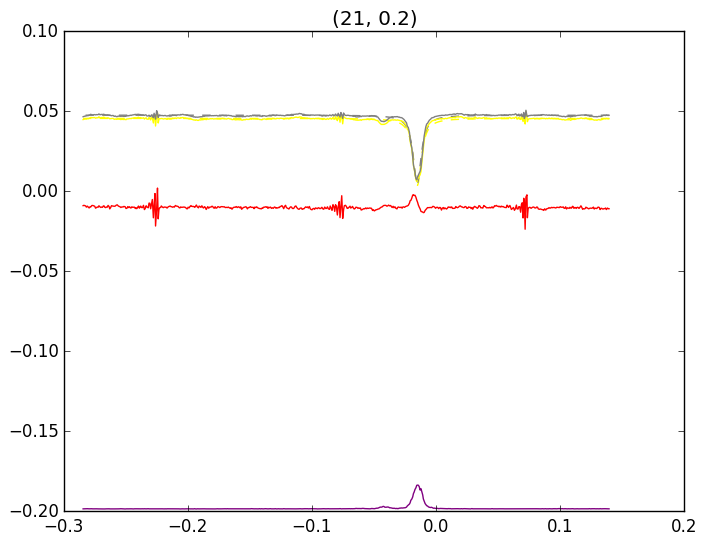

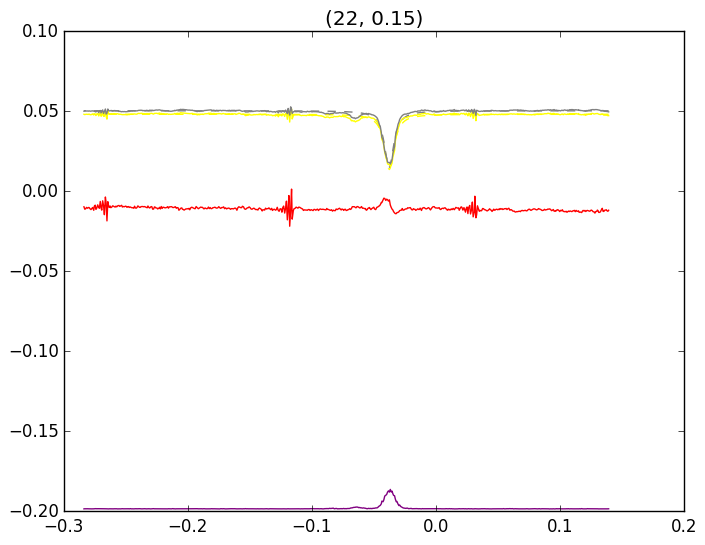

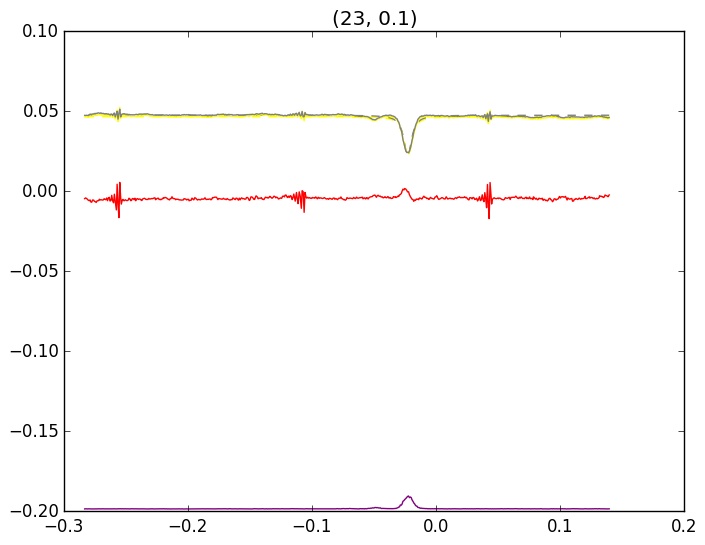

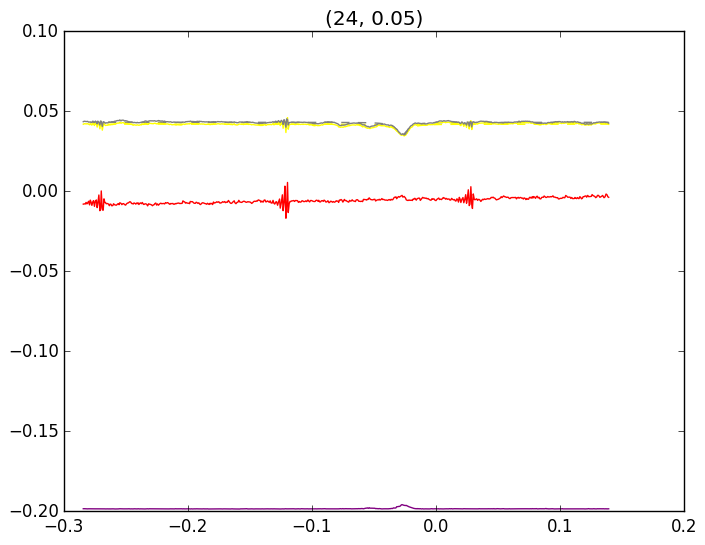

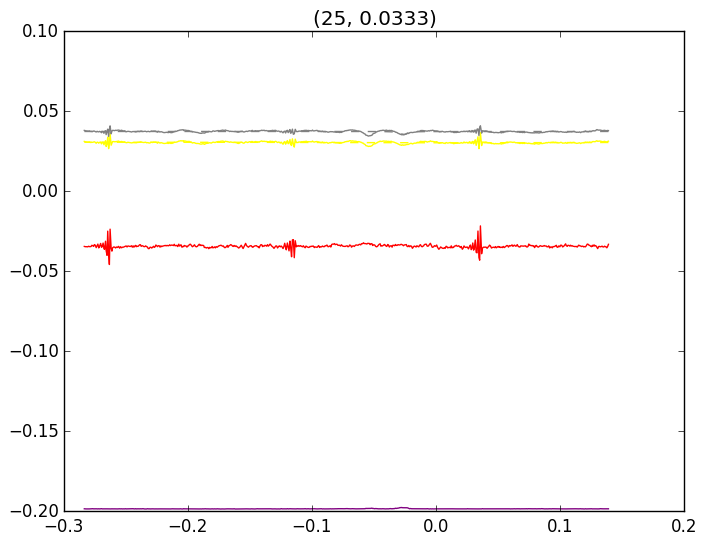

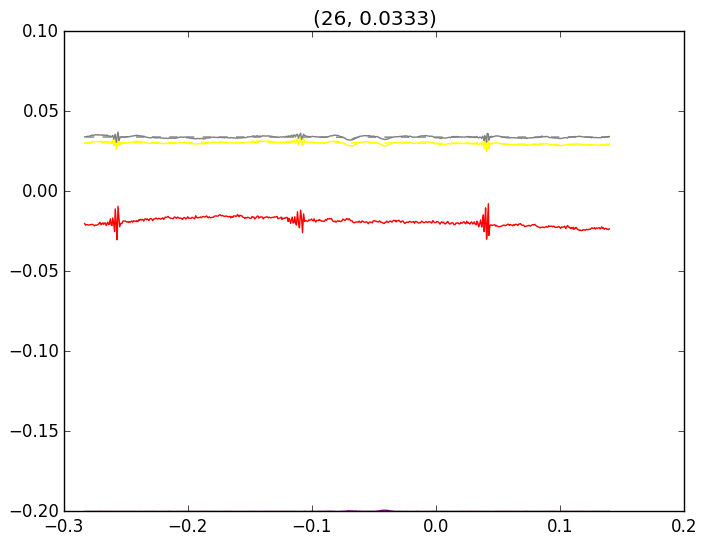

In [209]:
N=length(potencias)
alturaReal1=zeros(N)
alturaReal2=zeros(N)
model(x,p) = p[1]./(1+(x-p[2]).^2/(p[3])) + p[4]
fondo=0.04*ones(N);
altura=[-0.15*ones(20),-0.05*ones(N-20)];
for n=1:N
    datos=readcsv("./"*archivos[n]);
    a=200;b=200; #elijo a y b para que la rampa de voltaje solo sea decreciente
    ch1=map(Float64,datos[1:end,2][14+a:end-1-b])
    ch2=map(Float64,datos[1:end,3][14+a:end-1-b])
    fluo=map(Float64,datos[1:end,4][14+a:end-1-b])
    volt=map(Float64,datos[1:end,5][14+a:end-1-b])
    
    fit1=curve_fit(model, volt, ch1, [altura[n],-0.07,0.002,fondo[n]]) #cuarto arg es donde empiezan las p's
    fit2=curve_fit(model, volt, ch2, [altura[n],-0.07,0.002,fondo[n]]) #cuarto arg es donde empiezan las p's
    alturaReal1[n]=abs(fit1.param[1])
    alturaReal2[n]=abs(fit2.param[1])
    #println(fit1.param,fit1.param)
    
    figure()
    title((n,potencias[n]))
    plot(volt,model(volt,fit1.param),"--",color="yellow");
    plot(volt,model(volt,fit2.param),"--",color="gray");
    #plot(volt,color="red")
    plot(volt,5*(ch1-ch2),color="red")
    plot(volt,ch1,color="yellow")
    plot(volt,ch2,color="gray")
    plot(volt,fluo/10-0.2,color="purple")
    xlim([-0.3,0.2])
    ylim([-0.2,0.1])
end

In [ ]:
#f=open("./alturasPicos.csv","w")
#writecsv(f,[potencias alturaReal1 alturaReal2])
#close(f);

# A partir de acá puede iniciar

In [199]:
picos=readcsv("./alturasPicos.csv");

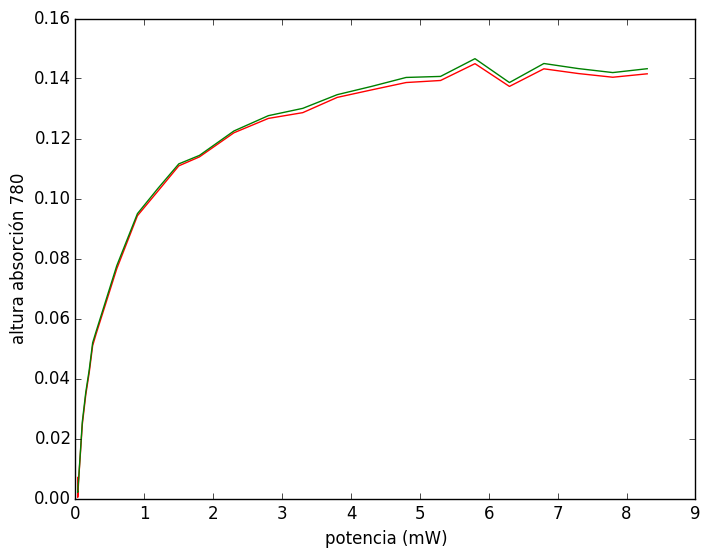

PyObject <matplotlib.text.Text object at 0x7f65315b4128>

In [207]:
plot(picos[:,1],picos[:,2],color="Red")
plot(picos[:,1],picos[:,3],color="Green")
xlabel("potencia (mW)")
ylabel("altura absorción 780")